# Mixscape reproduction

This vignette reproduces the Mixscape https://satijalab.org/seurat/articles/mixscape_vignette.html Vignette.
We demonstrate that pertpy can reproduce the results and go beyond Mixscape.

In [1]:
import pertpy as py
import muon as mu
import scanpy as sc

Unable to contact PyPI to check for the latest pertpy version. Do you have an internet 
connection?

# Getting the dataset

In [2]:
mdata = py.dt.burczynski_crispr()

/home/zeth/miniconda3/envs/pertpy/lib/python3.8/site-packages/mudata/_core/mudata.py:376: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [3]:
mdata

MuData object with n_obs × n_vars = 20729 × 18776
  4 modalities
    adt:	20729 x 4
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    gdo:	20729 x 111
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    hto:	20729 x 12
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    rna:	20729 x 18649
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'

# Preprocessing

## RNA

In [4]:
mdata["rna"]

AnnData object with n_obs × n_vars = 20729 × 18649
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
    var: 'name'

In [5]:
sc.pp.log1p(mdata["rna"])

In [6]:
sc.pp.highly_variable_genes(mdata["rna"], flavor="seurat")

In [7]:
sc.pp.scale(mdata["rna"])

## Protein

In [8]:
mdata["adt"]

AnnData object with n_obs × n_vars = 20729 × 4
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
    var: 'name'

In [9]:
mu.prot.pp.clr(mdata["adt"])

# RNA-based clustering is driven by confounding sources of variation

In [12]:
sc.pp.pca(mdata["rna"])

In [13]:
sc.pp.neighbors(mdata["rna"])

In [15]:
sc.tl.umap(mdata["rna"])

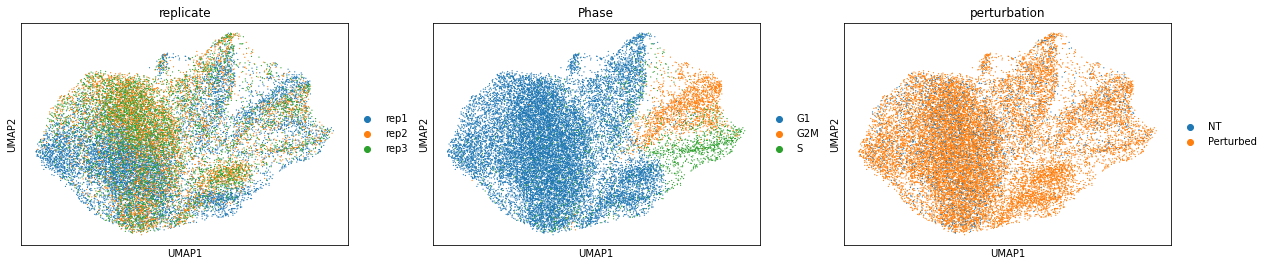

In [17]:
sc.pl.umap(mdata["rna"], color=["replicate", "Phase", "perturbation"])

# Calculating local perturbation signatures mitigates confounding effects

# Mixscape identifies cells with no detectable perturbation

# Inspecting mixscape results

# Visualizing perturbation responses with Linear Discriminant Analysis (LDA)